<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Weight_Normalization_A_Simple_Reparameterization_to_Accelerate_Training_of_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Weight Normalization: A Simple Reparameterization to Accelerate Training of Deep Neural Networks**

논문 링크: https://arxiv.org/abs/1602.07868

본 논문에서는 Batch Normalization과 마찬가지로 표현(expressiveness)를 줄이지 않고 weight vector의 크기와 방향을 분리한다. 하지만 BN과 달리 mini-batch과 의존관계가 없는 것이 특정이며, BN의 여러 단점을 보완했다.

## **Weight Normalization**

weight normalization은 layer의 결과가 아닌 weight값을 normalization 시킨다.

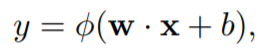

위와 같은 layer를 보면 이때, w는 k차원의 weight vector이며 b는 scalar bias이고  φ는 ReLU function이다.

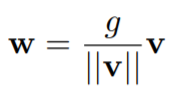

이런 상황에서 위의 식과 같이 w를 학습 가능한 scalar g와 parameter vector v를 통하여 reparameterization(재매개변수화)를 수행한다. 이때, ||v||는 L2 norm이고, v / ||v||는 v를 정규화한 값이며 g는 weight의 강도(magnitutde)를 조정한다.

### **Gradients**

그러면 과연 reparameterization을 하기 위한 g와 v의 값은 어떻게 구할까??

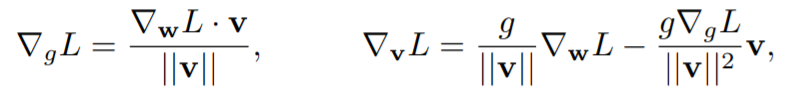

그리고 이때 g와 v를 위의 식과 같은 **stochastic gradient descent**로 최적화를 진행한다. 위의 식에서 ∇wL는 가중치 w에 대한 기울기이다. 위의 식을 보면 알 수 있듯이 **BN와 달리 위의 식은 mini-batch size와 독립적이기 때문에 최소환의 overhead만 발생**한다.

위의 식을 다른 방법으로도 나타낼 수 있다.

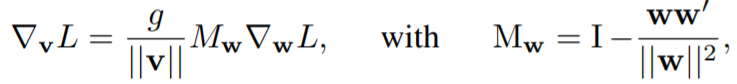

위의 식에서 M_w는 w vector에 투영되는 projection matrix이다. g / ||v|| 부분으로 가중치 기울기를 조정하고, 현재 weight vector에서 멀리 떨어진 gradient를 투영한다. 이때 w에서 멀어지게 투영되기 때문에 v의 norm은 momentum이 없는 gradient descent을 사용하여 weight update와 함께 단조롭게 증가한다.

## **Relation to batch normalization**

위에서 설명한 내용을 보면 Batch normalization과 상당히 유사하다는 느낌이 든다. 그 이유는 BN에서 정규화시 평균값을 0, 분산을 ||v||로 한 뒤, parameterization을 g로 하는 것과 같다고 생각할 수 있다. 하지만 BN의 경우는 σ^2[t]의 값이 batch size가 작을 경우 커질 수 있기 때문에 weight v의 L2 norm으로 할 경우 훨씬 안정적인 정규화가 가능하다고 논문에서 주장하고 있다. 뿐만아니라 WN은 BN과 달리 mini-batch size에 의존하지 않기 때문에 RNN 및 LSTM과 같은 모델에 적합하다.

그리고 WN은 경우에 따라 BN보다 빠르다. 그 이유로 CNN을 예시로 들면, weight의 수가 input의 수보다 훨씬 작기 때문에 WN의 연산량이 BN보다 훨씬 적다. BN의 경우는 input값의 모든 원소를 연산하고, 이미지 등의 고차원 데이터에서 매우 연산량이 높아진다.

## **Mean-only Batch Normalization**

Weight Normalization은 평균을 0으로 보장해주지 못한다. 따라서 본 논문에서는 mean-only batch normalization과 함께 사용할 것을 권장한다.

WN은 활성화 값의 평균과 layer의 weight를 독립적으로 분리할 수 없다. 따라서 각 layer의 평균간에 높은 종속성이 발생해버린다. 하지만 mean-only batch normalization을 사용하면 이러한 문제를 해결 할 수 있다.

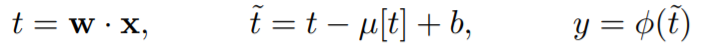

위의 식에서 µ[t]는 mini-batch의 평균이다. mean-only batch normalization은 위의 식을 보면 알 수 있듯이 BN과 마찬가지로 mini-batch의 평균값을 빼지만 mini-batch의 표준 편차로 나누지는 않는다.

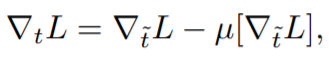

이때 pre-activation t의 loss function 식은 위와 같다.

mean-only batch normalization의 장점은 단순 v와 독립되는 것만 있는게 아니다.  먼저, BN의 단점 중 한가지는 mini-batch에서 계산된 noise가 많은 추정값을 사용하여, 활성화 값에 확률적인 잡을 추가한다는 것이다. 물론 일부 문제에는 이런 noise가 규제에 도움이 될 수 있지만, 강화 학습 등 noise에 민감한 domain에서는 오히려 성능을 낮춰버린다. 하지만, **mean-only batch normalization과 WN을 사용하면 큰 수의 법칙에 따라 노이즈가 훨씬 정규 분포의 형태를 띄기 때문에 노이즈가 완만하다. 또한 BN과 비교해 훈련 과정에서 노이즈가 적다.**

## **Experiments**

본 논문에서는 supervised classification과 generative modelling 그리고 reinforcement learning에 대해 각각 1개, 2개, 1개로 총 4가지의 실험을 진행했다.

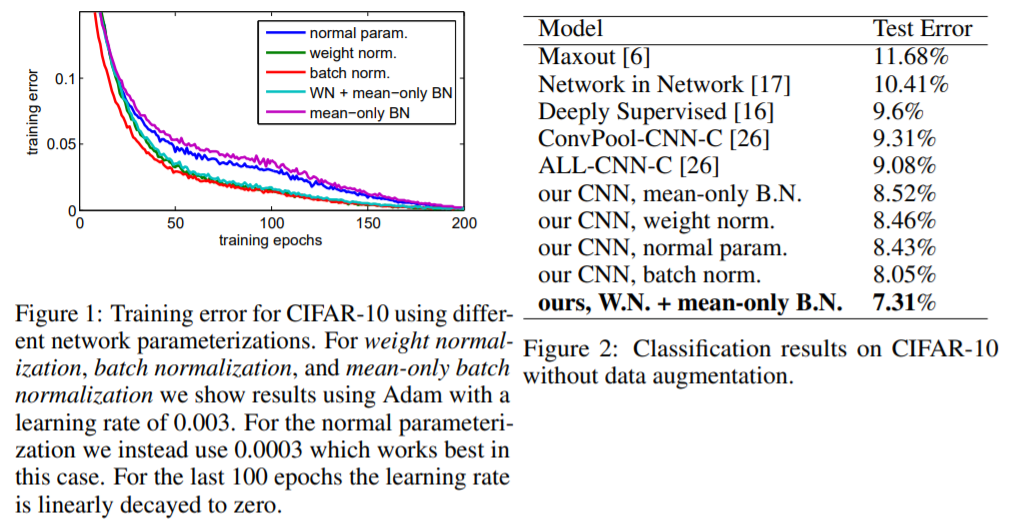

위의 그림 Figure 1과 Figure 2를 보면 CIFAR-10 dataset에 대해 WN과 mean-only BN을 비롯한 여러 normalization 기법과의 성능을 차이를 보여준다. 순서대로 1. standard parameterization, 2. batch normalization, 3. weight normalization, 4. weight normalization + mean-only batch normalization, 5. mean-only batch normalization + normal parameterization이다. WN + mean-only BM이 가장 낮은 Test Error를 보여주는 것을 알 수 있다.

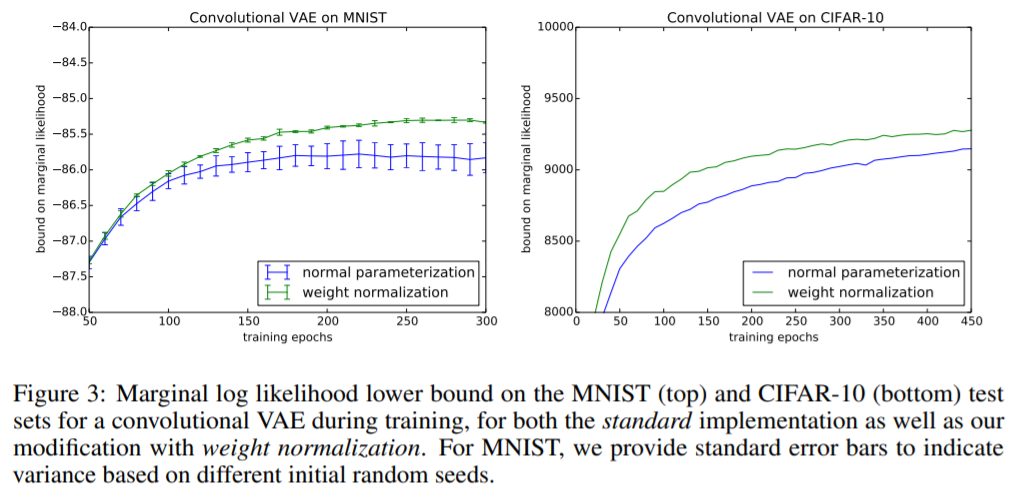

위의 그림 Figure 3은 MNIST dataset과 CIFAR-10 dataset에 대해 CGAN으로 normal parameterization과 weight normalization에 대해 실험을 했다. WN을 사용할 때가 분산이 더 적고 안정적으로 최적의 값에 수렴하는 것을 알 수 있다.

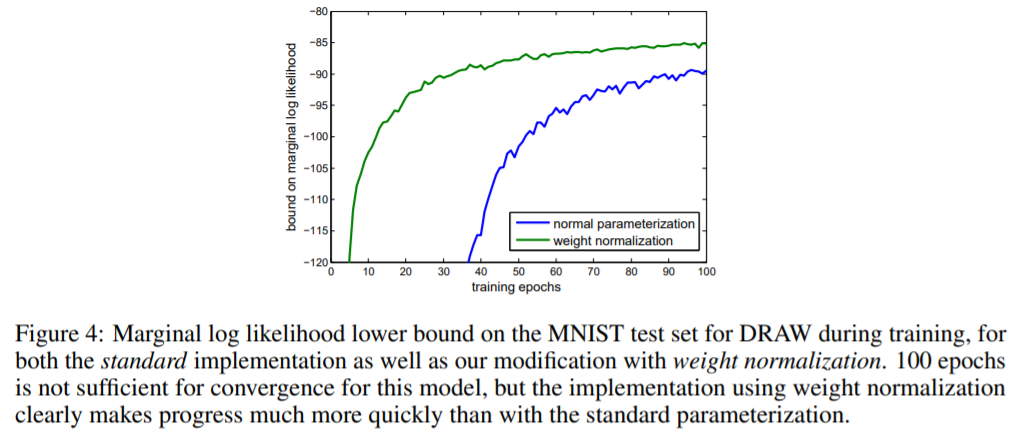

위의 그림 Figure 4는 MNIST dataset에 대해 DRAW(recurrent neural network for image generation)로 normal parameterization과 weight normalization에 대해 실험을 했다. 그림을 보면 알 수 있듯이 WN이 매우 빠르고 안정적으로 잘 수렴했다.

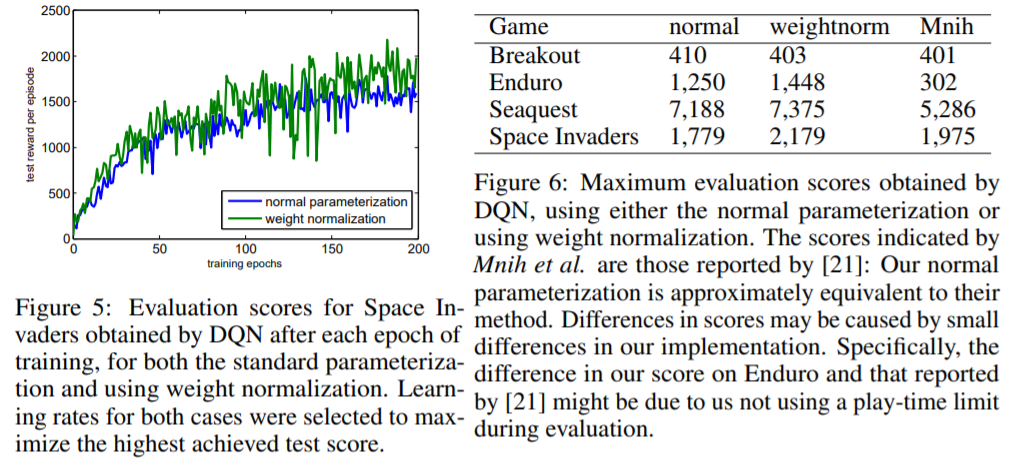

마지막으로 위의 그림 Figure 5와 Figure 6에서는 Space Invaders를 비롯한 다른 게임에 대해 DQN으로  weight normalization에 대해 실험을 했다. 이 역시 그림을 보면 WN이 DQN의 성능을 크게 향상시킨 것을 알 수 있다.1